# Etap 1.2.2
## wizualizacja danych z ""Data/Concatenated Features/by_quaters_features.csv" za pomocą t-SNE
## kolorowanie według ... lub nazwy spółki

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
final_df= pd.read_csv("Data/Concatenated Features/by_quaters_features.csv")

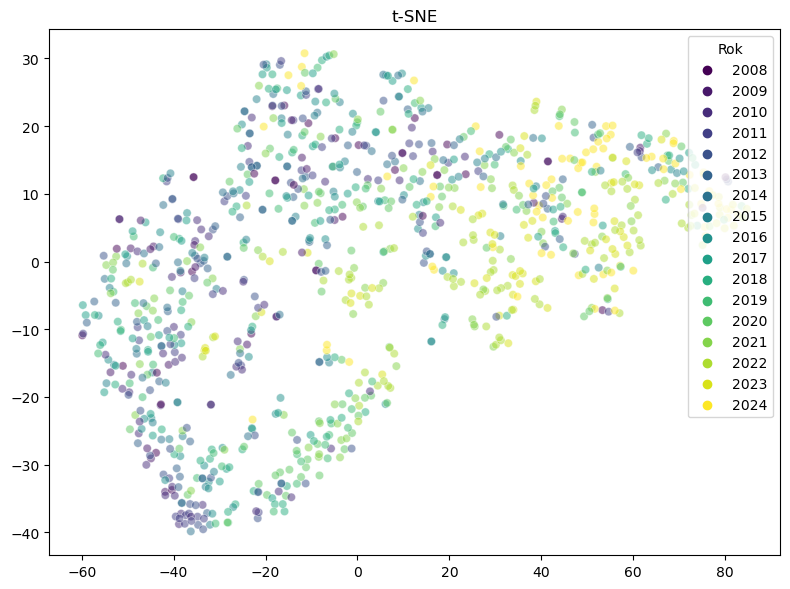

In [3]:
# Parametr: ile rekordów chcemy wyświetlić
n = 1000

# Losowy wybór n rekordów (jeśli mamy więcej niż n)
if len(final_df) > n:
    sampled_df = final_df.sample(n, random_state=42)
else:
    sampled_df = final_df.copy()

# 1. Przygotowanie danych: wybieramy tylko kolumny numeryczne i zamieniamy NaN na 0
X = sampled_df.select_dtypes(include=[np.number]).fillna(0)

# Upewnijmy się, że kolumna 'rocznie' jest typu liczbowego (int) i posortowana
sampled_df['Rok'] = pd.to_numeric(sampled_df['Rok'], errors='coerce')
sampled_df['Rok'] = sampled_df['Rok'].sort_values()

# 2. t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=20, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# 3. Wizualizacja
plt.figure(figsize=(8, 6))

# Scatter plot z legendą, uwzględniając porządek liczbowy
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=sampled_df['Rok'], palette='viridis', legend='full',alpha=0.5 )

# Dodajemy tytuł
plt.title('t-SNE')

# Wyświetlamy legendę
plt.legend(title='Rok', loc='upper right')

plt.tight_layout()
plt.show()


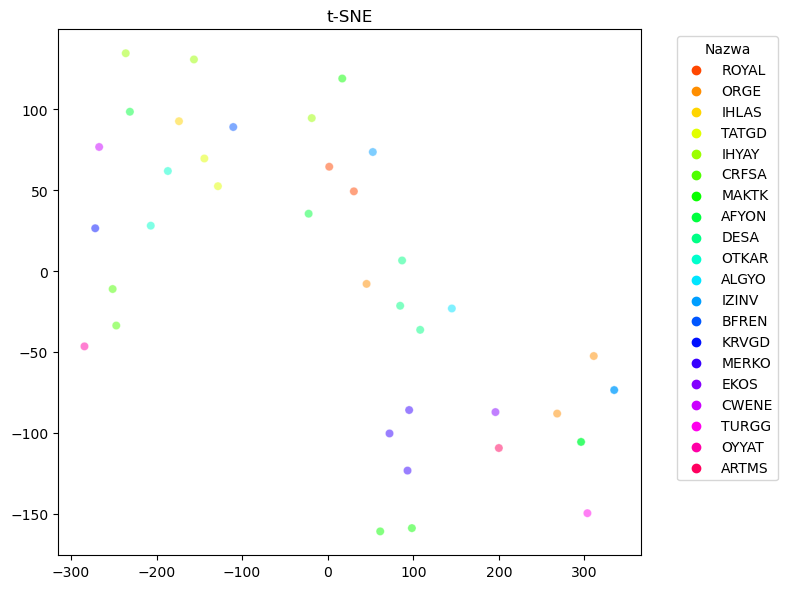

In [4]:
# Parametr: ile unikalnych nazw chcemy wybrać
N = 20  # Liczba unikalnych nazw

# Wybór N różnych nazw z kolumny 'nazwa' (lub jakiejkolwiek kolumny z unikalnymi wartościami)
unique_names = sampled_df['Nazwa'].drop_duplicates().sample(N, random_state=42)

# Filtrujemy rekordy, które odpowiadają wybranym nazwom
sampled_df_unique = sampled_df[sampled_df['Nazwa'].isin(unique_names)]

# 1. Przygotowanie danych: wybieramy tylko kolumny numeryczne i zamieniamy NaN na 0
X = sampled_df_unique.select_dtypes(include=[np.number]).fillna(0)


# 2. t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=min(N,5), n_iter=1000)
X_tsne = tsne.fit_transform(X)

# 3. Wizualizacja
plt.figure(figsize=(8, 6))

# 4. Przygotowujemy paletę kolorów dynamicznie
palette = sns.color_palette('hsv', n_colors=N)

# Scatter plot z legendą, uwzględniając porządek liczbowy
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=sampled_df_unique['Nazwa'], palette=palette, legend='full',alpha=0.5 )

# Dodajemy tytuł
plt.title('t-SNE')

# Legenda
plt.legend(title='Nazwa', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

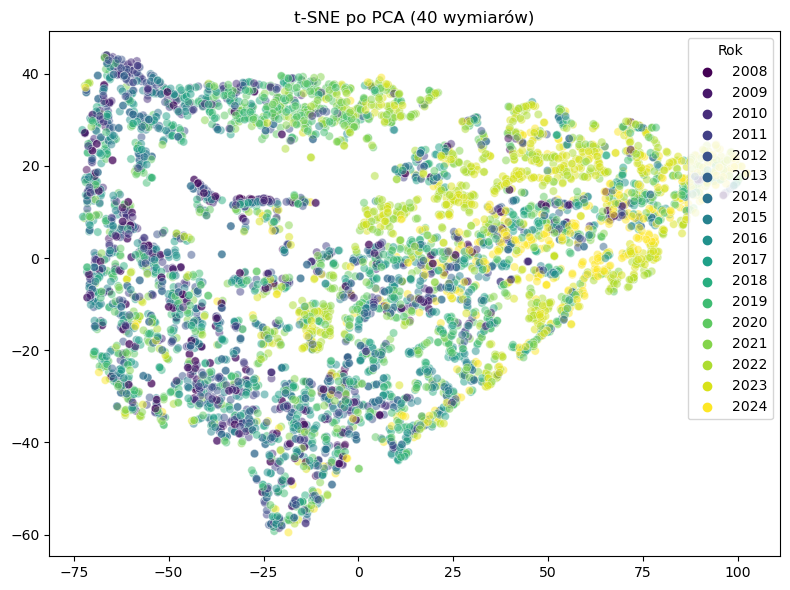

In [5]:
from sklearn.decomposition import PCA


# Parametr: ile rekordów chcemy wyświetlić
n = 5700

# Losowy wybór n rekordów (jeśli mamy więcej niż n)
if len(final_df) > n:
    sampled_df = final_df.sample(n, random_state=42)
else:
    sampled_df = final_df.copy()

# 1. Przygotowanie danych: wybieramy tylko kolumny numeryczne i zamieniamy NaN na 0
X = sampled_df.select_dtypes(include=[np.number]).fillna(0)

# 2. PCA redukcja do 40 wymiarów
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X)

# 3. t-SNE na danych po PCA
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=1000)
X_tsne = tsne.fit_transform(X_pca)

# 4. Upewnijmy się, że kolumna 'Rok' jest liczbą i w dobrej kolejności
sampled_df['Rok'] = pd.to_numeric(sampled_df['Rok'], errors='coerce')

# 5. Wizualizacja
plt.figure(figsize=(8, 6))



# Scatter plot z legendą
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=sampled_df['Rok'], palette='viridis', legend='full', alpha=0.5)

# Dodajemy tytuł
plt.title('t-SNE po PCA (40 wymiarów)')

# Legenda
plt.legend(title='Rok', loc='upper right')

plt.tight_layout()
plt.show()

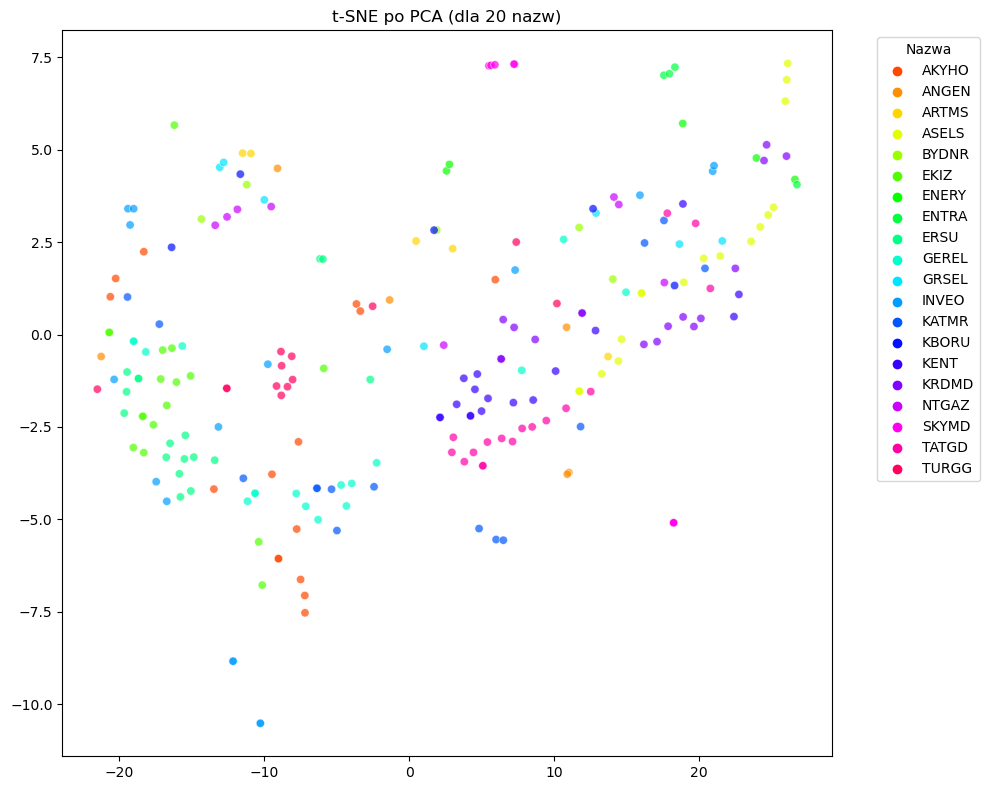

In [6]:
# Parametr: liczba unikalnych nazw do pokazania
N = 20  # <- tu ustawiasz ile chcesz

# 1. Wybieramy N unikalnych nazw
unique_names = final_df['Nazwa'].dropna().unique()
selected_names = np.random.choice(unique_names, size=min(N, len(unique_names)), replace=False)

# 2. Filtrowanie danych tylko do wybranych nazw
sampled_df = final_df[final_df['Nazwa'].isin(selected_names)].copy()

# 3. Przygotowanie danych: tylko numeryczne kolumny i NaN -> 0
X = sampled_df.select_dtypes(include=[np.number]).fillna(0)

# 4. PCA redukcja do 10 wymiarów
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X)

# 5. t-SNE na danych po PCA
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_pca)

# 6. Przygotowujemy paletę kolorów dynamicznie
palette = sns.color_palette('hsv', n_colors=N)

# 7. Wizualizacja
plt.figure(figsize=(10, 8))

# Scatter plot z kolorami według 'Nazwa'
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=sampled_df['Nazwa'], palette=palette, legend='full', alpha=0.7)

# Tytuł
plt.title(f't-SNE po PCA (dla {N} nazw)')

# Legenda
plt.legend(title='Nazwa', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
